# 0.) Import the US Perminent Visas using zip extractor

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1.) US perm Visas csv from cycle using zip extractor


In [ ]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f55f7c1d700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

In [ ]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [ ]:
df_select = df[["class_of_admission", "country_of_citizenship", "employer_city", "us_economic_sector", "case_status"]]

In [ ]:
df_select

,class_of_admission,country_of_citizenship,employer_city,us_economic_sector,case_status
0,J-1,NaN,NEW YORK,IT,Certified
1,B-2,NaN,CARLSTADT,Other Economic Sector,Denied
2,H-1B,NaN,GLEN ALLEN,Aerospace,Certified
3,B-2,NaN,FLUSHING,Other Economic Sector,Certified
4,L-1,NaN,ALBANY,Advanced Mfg,Certified
...,...,...,...,...,...
374357,NaN,SOUTH KOREA,ANAHEIM,NaN,Withdrawn
374358,L-1,VIETNAM,REDMOND,NaN,Withdrawn
374359,H-1B,INDIA,YPSILANTI,NaN,Withdrawn
374360,B-2,SOUTH KOREA,Phoenix,NaN,Withdrawn


# 3.) Clean your data for a decision tree


In [ ]:
df_select.dropna(inplace = True)
df_select.reset_index(inplace = True)
df_select

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,index,class_of_admission,country_of_citizenship,employer_city,us_economic_sector,case_status
0,20577,EWI,ECUADOR,LONG ISLAND CITY,Automotive,Certified-Expired
1,20578,H-1B,INDIA,COPPELL,Advanced Mfg,Certified
2,20579,L-1,PHILIPPINES,COPPELL,Advanced Mfg,Certified
3,20580,H-1B,INDIA,COPPELL,Advanced Mfg,Certified-Expired
4,20581,H-1B,INDIA,SAN JOSE,Advanced Mfg,Certified
...,...,...,...,...,...,...
104082,135261,H-1B,RUSSIA,NEW YORK,IT,Withdrawn
104083,135262,H-1B,CHINA,CHICAGO,Retail,Withdrawn
104084,135263,H-1B,ISRAEL,MOUNTAIN VIEW,Other Economic Sector,Withdrawn
104085,135264,H-1B,TURKEY,JERSEY CITY,Finance,Withdrawn


In [ ]:
dummies = pd.get_dummies(df_select[["class_of_admission", "country_of_citizenship", "employer_city", "us_economic_sector"]])
X = pd.concat([dummies], axis = 1)
y = df_select["case_status"]

# 4.) Fit and plot a decision tree of depth 3


In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth= 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

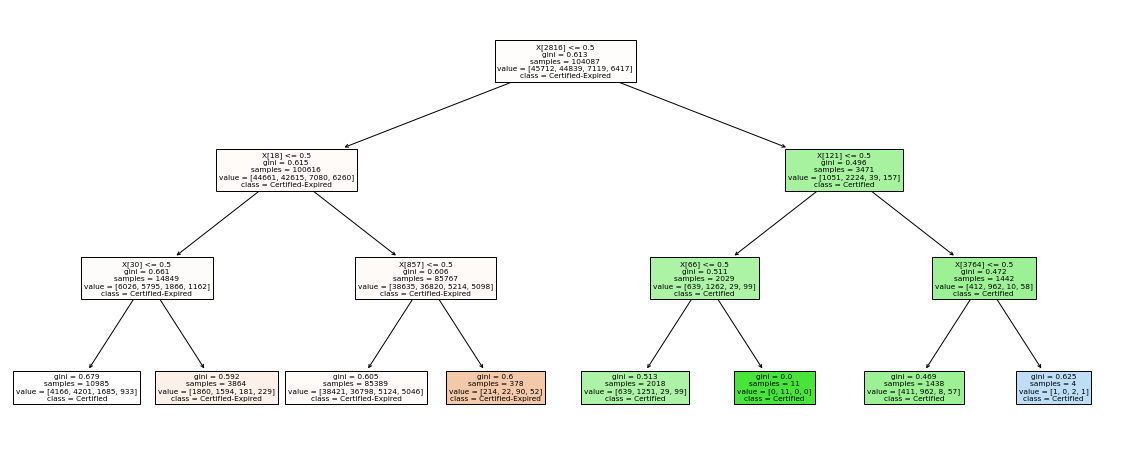

In [ ]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, class_names = y, filled=True)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node has the largest number of training samples assigned to it, and would therefore represent the most common prediction for the given inputs based on the training data. In the decision tree above, the largest one has 85389 samples assigned to it, which means that the most common prediction is when employer_city is not REDMOND, class_of_admission is not H1_B, and employer_city is not COLLEGE STATION.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
outputs= []
max_depth = [1,2,3,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [ ]:
for md in max_depth:
  clf = DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  outputs.append(score)
print(outputs)

[0.4487090188543293, 0.44969376726312, 0.450966734718386, 0.45089467995676713]


As the results show, when we add max_depth, the accuracy will increase, but not quite significantly. When max_depth is too large, there might exist overfitting problem. Thus, in this case, I think 4 is the best max_depth.